#DEMO

##Library

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#import librosa !pip install librosa
import os
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

##Import dataset

In [3]:
with open('./pickles_dataset/ins','rb') as f:
    df = pickle.load(f)
df = pd.DataFrame(df.to_numpy(),columns = ["harmonic","zcr","mfcc","spectrum","chroma","contrast","label"])
df['zcr'] = df['zcr'].astype("int64")
df['harmonic'] = df['harmonic'].astype("int64")
df.zcr = normalize(df.zcr.apply(lambda x: [x]).to_numpy().tolist())


###Imported dataset

In [4]:
df

,harmonic,zcr,mfcc,spectrum,chroma,contrast,label
0,0,1.0,"[-595.2376, 119.537605, -50.81658, -8.904817, ...","[0.0011364012, 0.004090574, 0.009503408, 0.019...","[0.25657171174031507, 0.14171514023225437, 0.1...","[21.493506440045845, 19.25726621842412, 20.503...",bass
1,0,1.0,"[-597.9395, 119.107635, -50.95782, -8.931551, ...","[0.0010399392, 0.0037321073, 0.008669907, 0.01...","[0.2650979140510493, 0.1397830404216664, 0.134...","[20.58749383145802, 19.323333085267038, 19.505...",bass
2,0,1.0,"[-595.7844, 119.17386, -50.79512, -8.915298, -...","[0.0011024936, 0.003963426, 0.0092055965, 0.01...","[0.2648447034684589, 0.14480421024048742, 0.14...","[21.410910088614685, 19.808847857369532, 20.29...",bass
3,0,1.0,"[-622.3646, 119.656906, -50.76271, -8.8419695,...","[0.00066067174, 0.002384198, 0.005538755, 0.01...","[0.26555434981269455, 0.1370658677083761, 0.13...","[21.14875185979185, 18.525458131889717, 20.660...",bass
4,0,1.0,"[-595.32904, 120.19392, -50.21294, -8.753614, ...","[0.0011676844, 0.004163325, 0.009648324, 0.019...","[0.2619090454182126, 0.13731757192211624, 0.14...","[20.830423613371803, 18.663498324050373, 20.01...",bass
...,...,...,...,...,...,...,...
247598,1,1.0,"[-297.45227, 111.675446, -70.83518, -35.55217,...","[0.0014331557, 0.0059405942, 0.015670028, 0.04...","[0.08091496145181044, 0.059044681438159066, 0....","[20.53404904579567, 13.765044165015693, 20.129...",vocal
247599,1,1.0,"[-298.70462, 114.44186, -74.533104, -32.512306...","[0.0015623921, 0.0061985627, 0.01706814, 0.049...","[0.8502870736276478, 0.11157655643492, 0.06760...","[19.955898042550622, 13.689266630347447, 20.13...",vocal
247600,1,1.0,"[-298.28595, 115.47002, -73.8521, -32.010094, ...","[0.0016741533, 0.0069151963, 0.020810027, 0.05...","[0.8242203245466028, 0.10133141825615322, 0.06...","[20.535433448922113, 13.607363435788633, 20.36...",vocal
247601,0,1.0,"[-296.19183, 114.77967, -75.18143, -32.49483, ...","[0.0017348552, 0.0063843257, 0.017872967, 0.04...","[0.8323613346039664, 0.0899756790040338, 0.061...","[18.917373989926777, 13.457411596502634, 20.39...",vocal


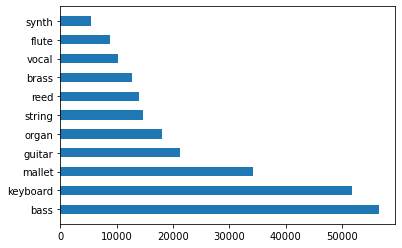

In [5]:
#Label distribution
d = df.label.value_counts().to_dict()
plt.barh(list(d.keys()), list(d.values()),height = 0.5)
plt.show()

In [6]:
remove_mallet_id = np.random.choice(df[df.label == "mallet"].index, size = 17000,replace=False)
remove_keyboard_id = np.random.choice(df[df.label == "keyboard"].index, size = 38000,replace=False)
remove_bass_id = np.random.choice(df[df.label == "bass"].index, size = 38000,replace=False)
df = df.drop(np.concatenate([remove_mallet_id,remove_keyboard_id,remove_bass_id]),0)

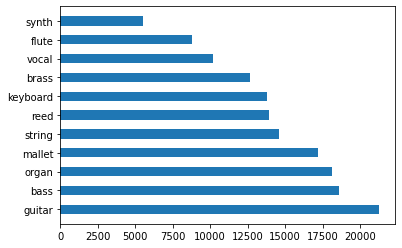

In [7]:
#After downsampling
d = df.label.value_counts().to_dict()
plt.barh(list(d.keys()), list(d.values()),height = 0.5)
plt.show()

##Preparation

In [12]:
label_encoder = LabelEncoder()
label_encoder.fit(df.label.unique())
df_label = label_encoder.transform(df.label) 


In [13]:
#Convert dataframe to right format
def scale_feature(df,feature_name):
    scaler = StandardScaler()
    if df[feature_name].dtype != 'float64' and df[feature_name].dtype != 'int64': 
        scaled_feature = df[feature_name].to_numpy().tolist()
    else:
        scaled_feature =  df[feature_name]
        return scaled_feature.apply(lambda x: [x]).to_numpy().tolist()
    res = []
    for i in range(df.shape[0]):
        temp = scaled_feature[i]
        res.append(temp)
    return res

def to_learnable(df,features):
    return np.concatenate([np.array(scale_feature(df,feature)) for feature in features],axis = 1)

##Learning and predicting
<p>Load test data before running this section</p>

###Mfcc

In [14]:
features = ['mfcc']

In [15]:
"""k_range = list(range(1,11))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(to_learnable(df,features), df_label)
    predicted_label = knn.predict(to_learnable(validate_df,features))
    scores.append(accuracy_score(predicted_label,label_encoder.transform(validate_df.label)))
plt.plot(k_range, scores) -> 1,4,10""" 

'k_range = list(range(1,11))\nscores = []\nfor k in k_range:\n    knn = KNeighborsClassifier(n_neighbors = k)\n    knn.fit(to_learnable(df,features), df_label)\n    predicted_label = knn.predict(to_learnable(validate_df,features))\n    scores.append(accuracy_score(predicted_label,label_encoder.transform(validate_df.label)))\nplt.plot(k_range, scores) -> 1,4,10'

In [16]:
#train
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(to_learnable(df,features), df_label)


KNeighborsClassifier(n_neighbors=4)

In [17]:
with open('./demo/data/guitar_test_ins','rb') as f:
    guitar_test = pickle.load(f)
guitar_test = pd.DataFrame(guitar_test.to_numpy(),columns=["harmonic","zcr","mfcc","spectrum","chroma","contrast"])
guitar_test.zcr = guitar_test.zcr.astype('int64')
guitar_test.harmonic = guitar_test.harmonic.astype('int64')
guitar_test.zcr = normalize(guitar_test.zcr.apply(lambda x: [x]).to_numpy().tolist())

In [18]:
with open('./demo/data/test_ins','rb') as f:
    flute_test = pickle.load(f)
flute_test = pd.DataFrame(flute_test.to_numpy(),columns=["harmonic","zcr","mfcc","spectrum","chroma","contrast"])
flute_test.zcr = flute_test.zcr.astype('int64')
flute_test.harmonic = flute_test.harmonic.astype('int64')
flute_test.zcr = normalize(flute_test.zcr.apply(lambda x: [x]).to_numpy().tolist())

In [21]:
with open('./demo/data/bass_test_ins','rb') as f:
    bass_test = pickle.load(f)
bass_test = pd.DataFrame(bass_test.to_numpy(),columns=["harmonic","zcr","mfcc","spectrum","chroma","contrast"])
bass_test.zcr = bass_test.zcr.astype('int64')
bass_test.harmonic = bass_test.harmonic.astype('int64')
bass_test.zcr = normalize(bass_test.zcr.apply(lambda x: [x]).to_numpy().tolist())

In [22]:
with open('./demo/data/piano_test_ins','rb') as f:
    piano_test = pickle.load(f)
piano_test = pd.DataFrame(piano_test.to_numpy(),columns=["harmonic","zcr","mfcc","spectrum","chroma","contrast"])
piano_test.zcr = piano_test.zcr.astype('int64')
piano_test.harmonic = piano_test.harmonic.astype('int64')
piano_test.zcr = normalize(piano_test.zcr.apply(lambda x: [x]).to_numpy().tolist())

In [23]:
with open('./demo/data/cellotest_ins','rb') as f:
    cello_test = pickle.load(f)
cello_test = pd.DataFrame(cello_test.to_numpy(),columns=["harmonic","zcr","mfcc","spectrum","chroma","contrast"])
cello_test.zcr = cello_test.zcr.astype('int64')
cello_test.harmonic = cello_test.harmonic.astype('int64')
cello_test.zcr = normalize(cello_test.zcr.apply(lambda x: [x]).to_numpy().tolist())

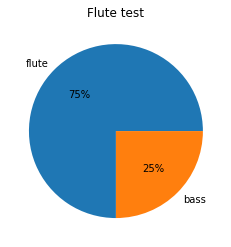

In [24]:
#required test data to be loaded
d = pd.DataFrame({"result":label_encoder.inverse_transform(knn.predict(to_learnable(flute_test,features)))}).value_counts()[:3]
"""plt.pie(pd.DataFrame({"result":label_encoder.inverse_transform(knn.predict(to_learnable(test,features)))}).value_counts())"""

labels = list(map(lambda x:x[0],list(d.to_dict().keys())))
values = list(d.to_dict().values())
plt.pie(d,labels = labels,autopct=lambda x:str(int(x)) + "%")
plt.title("Flute test")
plt.show()

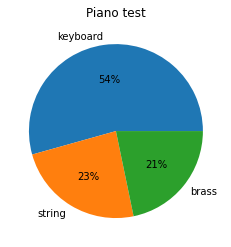

In [25]:
d = pd.DataFrame({"result":label_encoder.inverse_transform(knn.predict(to_learnable(piano_test,features)))}).value_counts()[:3]
labels = list(map(lambda x:x[0],list(d.to_dict().keys())))
values = list(d.to_dict().values())
plt.pie(d,labels = labels,autopct=lambda x:str(int(x)) + "%")
plt.title("Piano test")
plt.show()

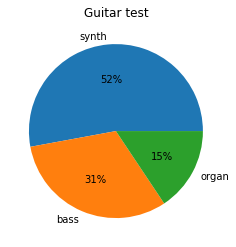

In [26]:
d = pd.DataFrame({"result":label_encoder.inverse_transform(knn.predict(to_learnable(guitar_test,features)))}).value_counts()[:3]
labels = list(map(lambda x:x[0],list(d.to_dict().keys())))
values = list(d.to_dict().values())
plt.pie(d,labels = labels,autopct=lambda x:str(int(x)) + "%")
plt.title("Guitar test")
plt.show()

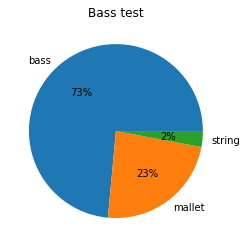

In [27]:
d = pd.DataFrame({"result":label_encoder.inverse_transform(knn.predict(to_learnable(bass_test,features)))}).value_counts()[:3]
labels = list(map(lambda x:x[0],list(d.to_dict().keys())))
values = list(d.to_dict().values())
plt.pie(d,labels = labels,autopct=lambda x:str(int(x)) + "%")
plt.title("Bass test")
plt.show()

###Average zero crossing,Harmonic ,Chroma ,Contrast, Mfcc and Spectrum

In [28]:
features = ['harmonic','zcr','mfcc','chroma','spectrum','contrast']

In [29]:
"""k_range = list(range(1,11))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(to_learnable(df,features), df_label)
    predicted_label = knn.predict(to_learnable(validate_df,features))
    scores.append(accuracy_score(predicted_label,label_encoder.transform(validate_df.label)))
plt.plot(k_range, scores) """

'k_range = list(range(1,11))\nscores = []\nfor k in k_range:\n    knn = KNeighborsClassifier(n_neighbors = k)\n    knn.fit(to_learnable(df,features), df_label)\n    predicted_label = knn.predict(to_learnable(validate_df,features))\n    scores.append(accuracy_score(predicted_label,label_encoder.transform(validate_df.label)))\nplt.plot(k_range, scores) '

In [30]:
#train
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(to_learnable(df,features), df_label)


KNeighborsClassifier(n_neighbors=4)

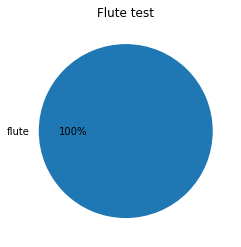

In [31]:
#required test data to be loaded
d = pd.DataFrame({"result":label_encoder.inverse_transform(knn.predict(to_learnable(flute_test,features)))}).value_counts()[:3]
"""plt.pie(pd.DataFrame({"result":label_encoder.inverse_transform(knn.predict(to_learnable(test,features)))}).value_counts())"""

labels = list(map(lambda x:x[0],list(d.to_dict().keys())))
values = list(d.to_dict().values())
plt.pie(d,labels = labels,autopct=lambda x:str(int(x)) + "%")
plt.title("Flute test")
plt.show()

In [33]:
validate_df = None
test_df = None
with open("./demo/data/validate_test","rb") as f:
    validate_df,test_df = pickle.load(f)[1:]
test_df = pd.DataFrame(test_df.to_numpy(),columns=["harmonic","zcr","mfcc","spectrum","chroma","contrast","label"])
test_df.zcr = test_df.zcr.astype('int64')
test_df.harmonic = test_df.harmonic.astype('int64')
validate_df = pd.DataFrame(validate_df.to_numpy(),columns=["harmonic","zcr","mfcc","spectrum","chroma","contrast","label"])
validate_df.zcr = validate_df.zcr.astype('int64')
validate_df.harmonic = validate_df.harmonic.astype('int64')

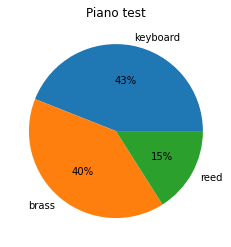

In [34]:
d = pd.DataFrame({"result":label_encoder.inverse_transform(knn.predict(to_learnable(piano_test,features)))}).value_counts()[:3]
labels = list(map(lambda x:x[0],list(d.to_dict().keys())))
values = list(d.to_dict().values())
plt.pie(d,labels = labels,autopct=lambda x:str(int(x)) + "%")
plt.title("Piano test")
plt.show()

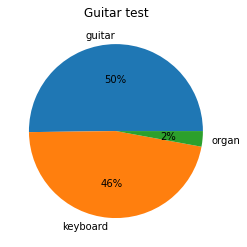

In [35]:
d = pd.DataFrame({"result":label_encoder.inverse_transform(knn.predict(to_learnable(guitar_test,features)))}).value_counts()[:3]
labels = list(map(lambda x:x[0],list(d.to_dict().keys())))
values = list(d.to_dict().values())
plt.pie(d,labels = labels,autopct=lambda x:str(int(x)) + "%")
plt.title("Guitar test")
plt.show()

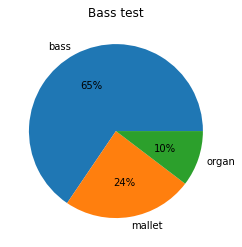

In [36]:
d = pd.DataFrame({"result":label_encoder.inverse_transform(knn.predict(to_learnable(bass_test,features)))}).value_counts()[:3]
labels = list(map(lambda x:x[0],list(d.to_dict().keys())))
values = list(d.to_dict().values())
plt.pie(d,labels = labels,autopct=lambda x:str(int(x)) + "%")
plt.title("Bass test")
plt.show()

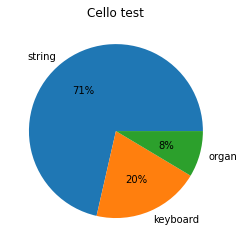

In [37]:
d = pd.DataFrame({"result":label_encoder.inverse_transform(knn.predict(to_learnable(cello_test,features)))}).value_counts()[:3]
labels = list(map(lambda x:x[0],list(d.to_dict().keys())))
values = list(d.to_dict().values())
plt.pie(d,labels = labels,autopct=lambda x:str(int(x)) + "%")
plt.title("Cello test")
plt.show()

##Load test data
This includes: guitar, flute, bass, piano </br> 
flute: ../pickles/test_ins </br>
guitar: ../pickles/guitar_test_ins </br>
bass: ../pickles/bass_test_ins </br>
piano:../pickles/piano_test_ins </br>

Load nsynth test

###Extract faeture of test files
Not require

In [ ]:
import librosa
import numpy as np
import pandas as  pd
from matplotlib import pyplot as plt
import json,pickle
import os

def avg_zero_crossing(array,sr):
    n = len(array)
    s = 0
    for ele in array:
        if ele:
            s += 1
    return s/(n/sr)

def feature_extract(file):
    try:
        """
        Define function that takes in a file an returns features in an array
        """
    
        #get wave representation
        y, sr = librosa.load(file)
        
        #determine if instruemnt is harmonic or percussive by comparing means
        y_harmonic, y_percussive = librosa.effects.hpss(y)
        if np.mean(y_harmonic)>np.mean(y_percussive):
            harmonic=1
        else:
            harmonic=0
        
        #Mel-frequency cepstral coefficients (MFCCs)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        #temporal averaging
        mfcc=np.mean(mfcc,axis=1)
    
        #get the mel-scaled spectrogram
        spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=32,fmax=8000)  
        #temporally average spectrogram
        spectrogram = np.mean(spectrogram, axis = 1)
    
        #compute chroma energy
        chroma = librosa.feature.chroma_cens(y=y, sr=sr)
        #temporally average chroma
        chroma = np.mean(chroma, axis = 1)
    
        #compute spectral contrast
        contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
        contrast = np.mean(contrast, axis= 1)
        
        #avg_zero_crossing
        zero_crossing_feature = avg_zero_crossing(librosa.zero_crossings(y),sr)
        
        return [harmonic,zero_crossing_feature, mfcc, spectrogram, chroma, contrast]
    except:
        pass



#bo cai instrument name di

path = '/content/drive/MyDrive/Colab_Notebooks/data/instrument/test/files'
#dest = r'C:\Users\nguyenducanh\Desktop\current_proj\dataset\completed'
instrument_names = os.listdir(path)
for ele in instrument_names:
    tmp_matrix = feature_extract(os.path.join(path,ele))
    #os.rename(os.path.join(path,ele),os.path.join(dest,ele))
    with open(os.path.join('/content/drive/MyDrive/Colab_Notebooks/data/instrument/test/feature_test',ele + '_feature_bin'),"wb") as f:
        pickle.dump(tmp_matrix,f)

In [ ]:
path = '/content/drive/MyDrive/Colab_Notebooks/data/instrument/test/feature_test'
names = os.listdir(path)
matrix = []
for ele in names:
  try:  
    tmp = []
    with open(os.path.join(path,ele), "rb") as f:
      tmp = pickle.load(f)
    matrix.append(tmp)
  except:
    pass
test = pd.DataFrame(matrix,columns = ["harmonic","zcr","mfcc","spectrum","chroma","contrast"])
with open('/content/drive/MyDrive/Colab_Notebooks/data/instrument/test/pickles/test_ins','wb') as f:
  pickle.dump(test,f)